In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats as stats
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
display(data.describe())
print(f"Количество пропусков:\n{data.isna().sum()}\n")
print(f"Количество дубликатов: {data.duplicated().sum()}")

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество пропусков:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Количество дубликатов: 0


In [6]:
data.columns = data.columns.str.lower()

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [8]:
display(data[data['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data.dropna(subset=['name'], inplace=True)

In [10]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data['year_of_release'].isna().mean()*100

1.6095255190570215

In [12]:
data.dropna(subset=['year_of_release'], inplace=True)

In [13]:
display(data[data['critic_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data['critic_score'].isna().sum()

8461

In [15]:
data['critic_score'].isna().mean()*100

51.453417659936754

In [16]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [17]:
data['user_score'].isna().mean()*100

54.61566528825104

In [18]:
data['user_score'].isna().sum()

8981

In [19]:
display(data[data['rating'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
data['rating'].isna().sum()

6676

In [21]:
data['rating'].isna().mean()*100

40.59839455120409

In [22]:
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [23]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [24]:
data['sum_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sum_sales, dtype: float64

In [25]:
display(data.pivot_table(index='year_of_release', values='name', aggfunc='count'))

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


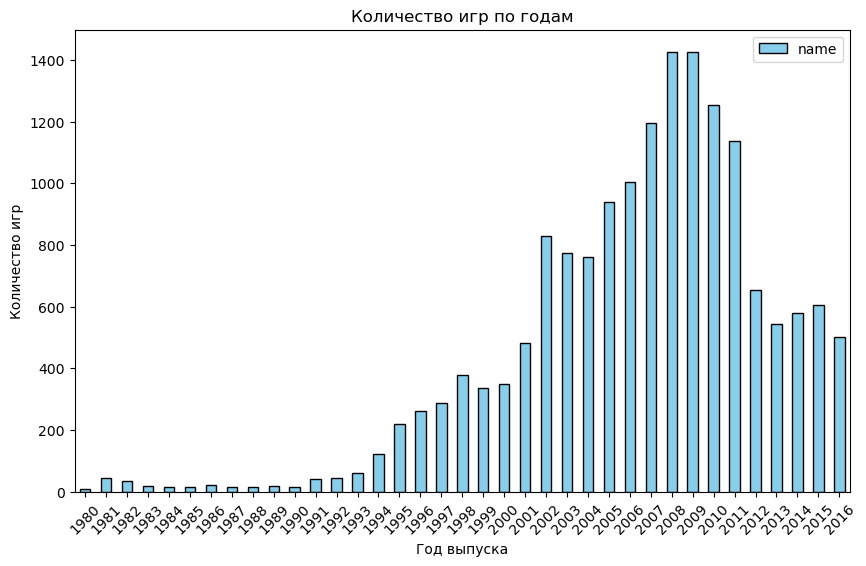

In [26]:
(data.pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(
    kind='bar', figsize=(10, 6), 
    color='skyblue', 
    edgecolor='black', 
    title='Количество игр по годам', 
    xlabel='Год выпуска', 
    ylabel='Количество игр', 
    rot=45
))
plt.show()

<Axes: title={'center': 'Количество игр по годам'}, xlabel='Год выпуска', ylabel='Количество игр'>

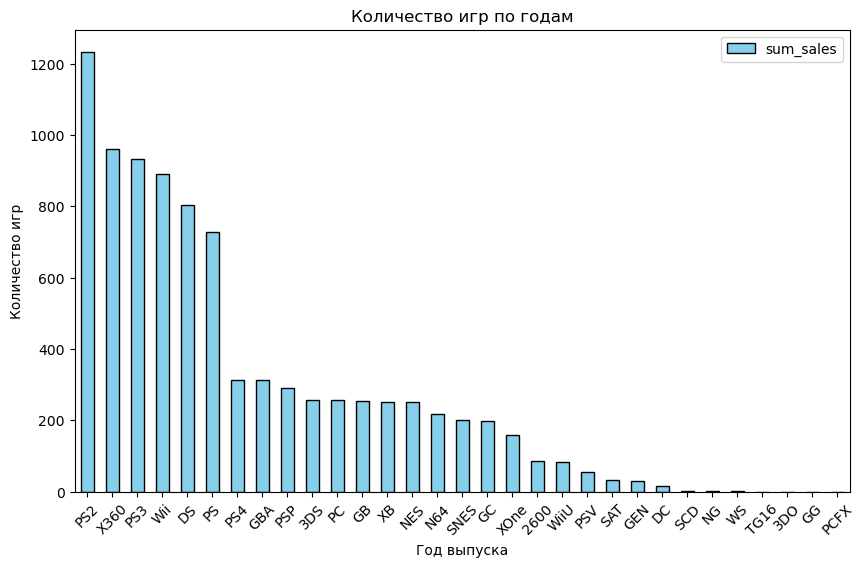

In [27]:
(data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales', ascending=False)
 .plot(
    kind='bar', figsize=(10, 6), 
    color='skyblue', 
    edgecolor='black', 
    title='Количество игр по годам', 
    xlabel='Год выпуска', 
    ylabel='Количество игр', 
    rot=45
))

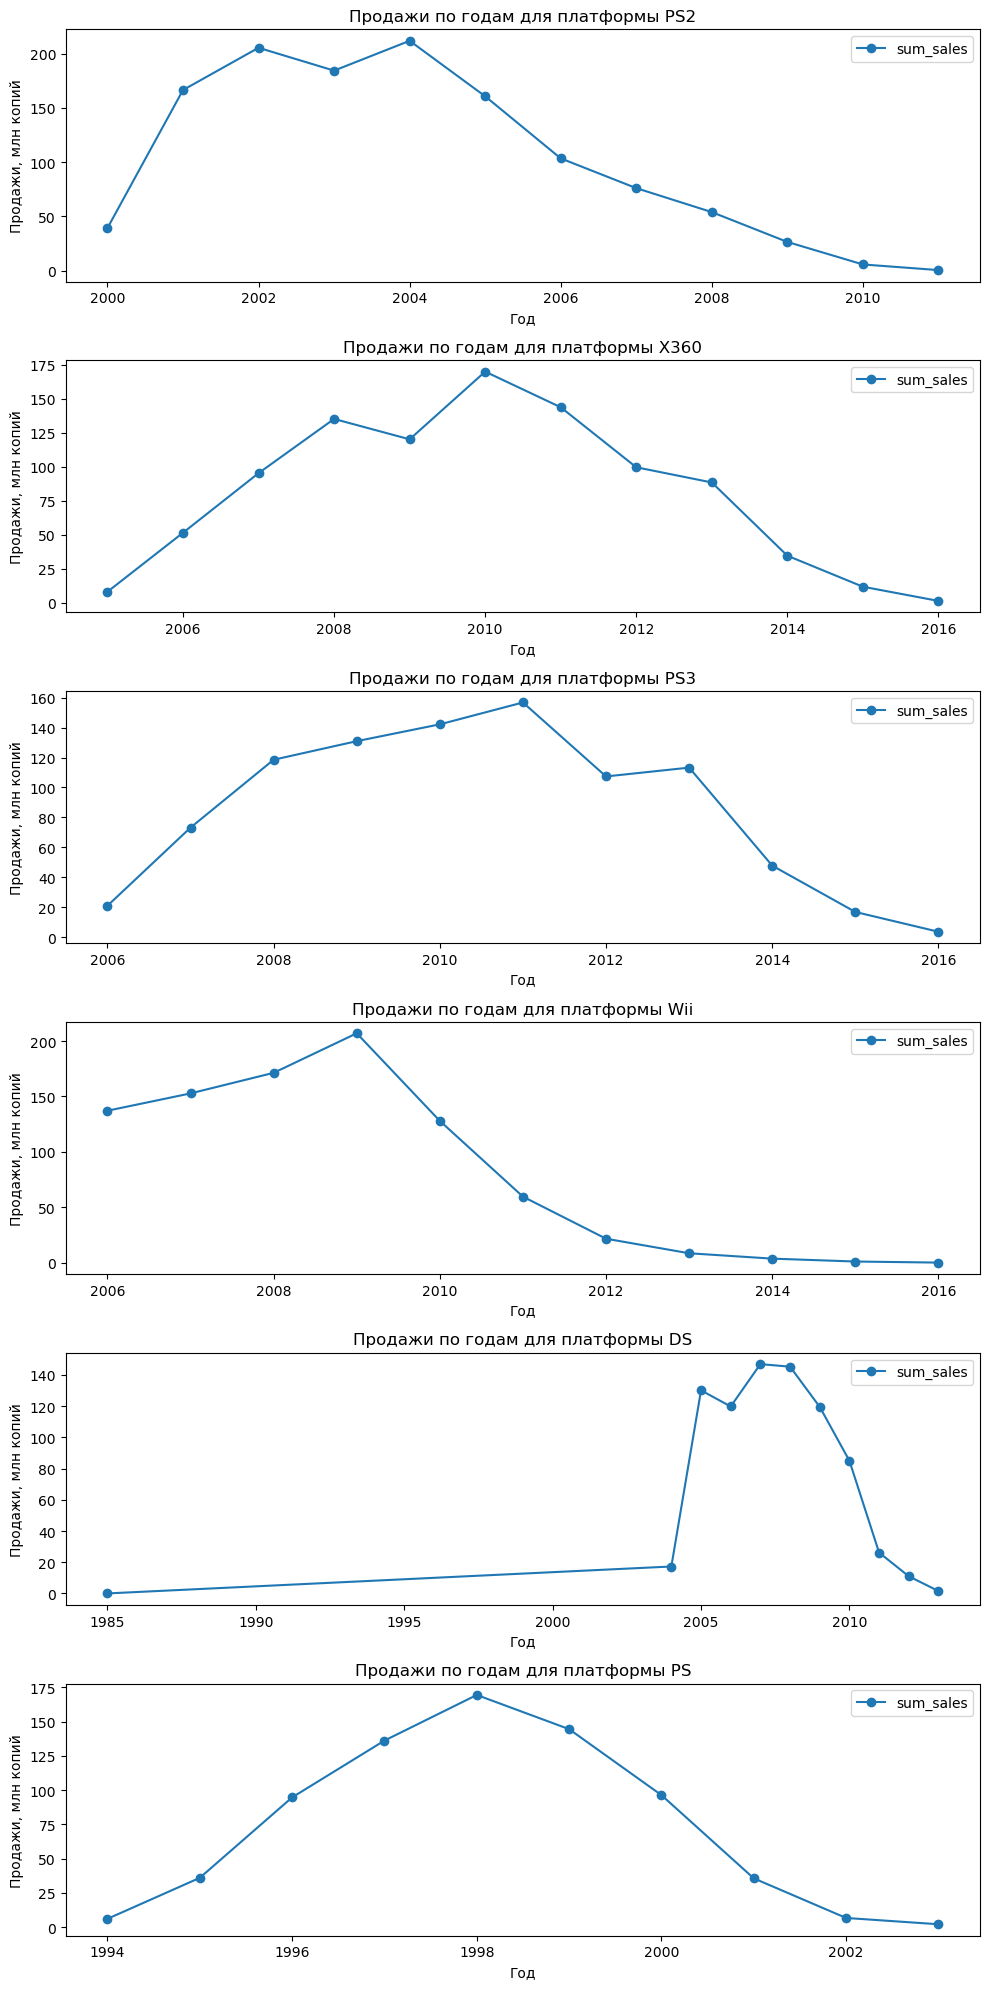

In [28]:
top_platforms = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(6).index
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 20))

for i, platform in enumerate(top_platforms):
    platform_sales_by_year = data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    platform_sales_by_year.plot(ax=axes[i], marker = 'o', title=f'Продажи по годам для платформы {platform}', xlabel='Год', ylabel='Продажи, млн копий')

plt.tight_layout()
plt.show()

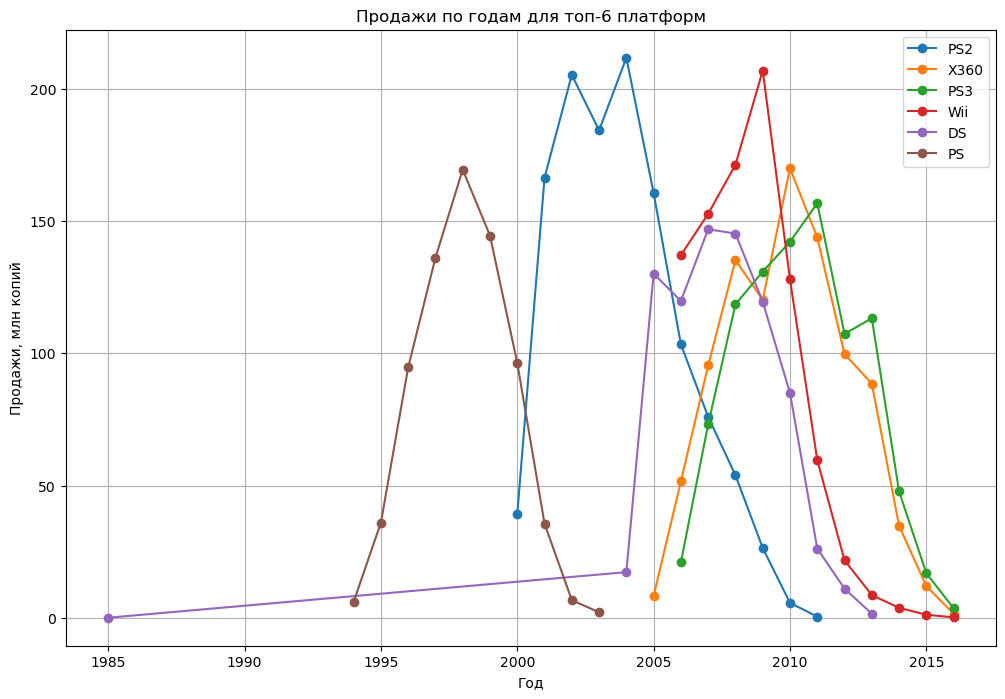

In [29]:
plt.figure(figsize=(12, 8))

for platform in top_platforms:
    platform_sales_by_year = data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    plt.plot(platform_sales_by_year.index, platform_sales_by_year['sum_sales'], label=platform, marker='o')

plt.title('Продажи по годам для топ-6 платформ')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(6)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [31]:
actual_data = data[data['year_of_release'].between(2014, 2016)]
display(actual_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


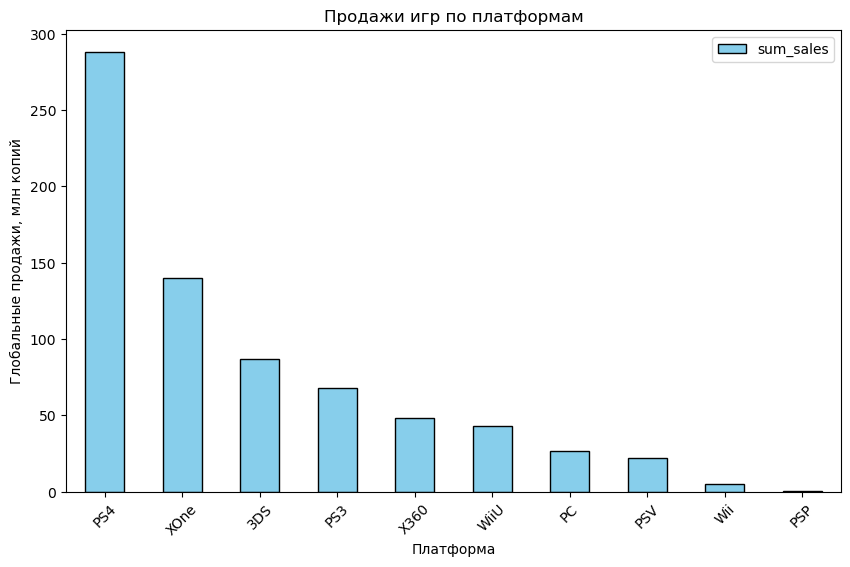

In [32]:
(actual_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales', ascending=False)
 .plot(
    kind='bar', 
    figsize=(10, 6), 
    color='skyblue', 
    edgecolor='black', 
    title='Продажи игр по платформам',  # Новое название графика
    xlabel='Платформа',  # Новое название оси x
    ylabel='Глобальные продажи, млн копий',  # Новое название оси y
    rot=45
))
plt.show()

In [33]:
actual_platform_sales = (actual_data.pivot_table(index=['platform'], values = 'sum_sales', aggfunc='sum')).sort_values(by = 'sum_sales', ascending = False)
actual_platform_sales

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


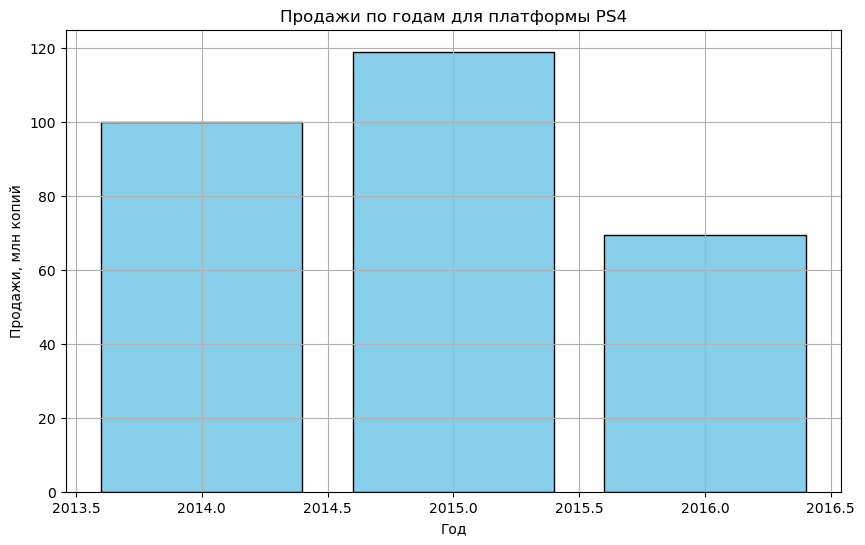

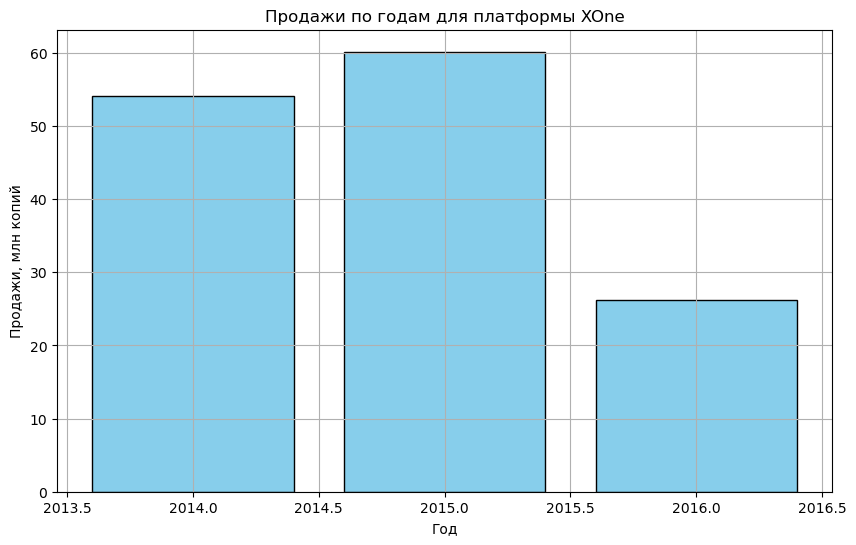

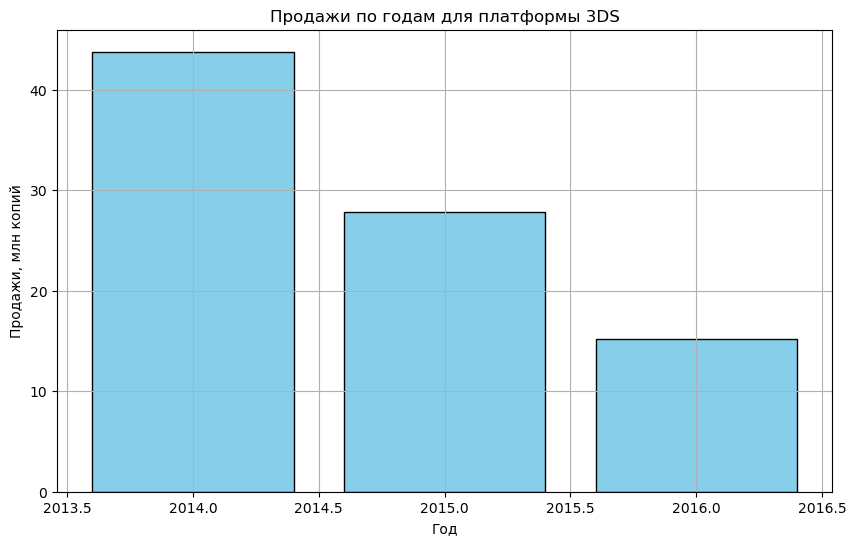

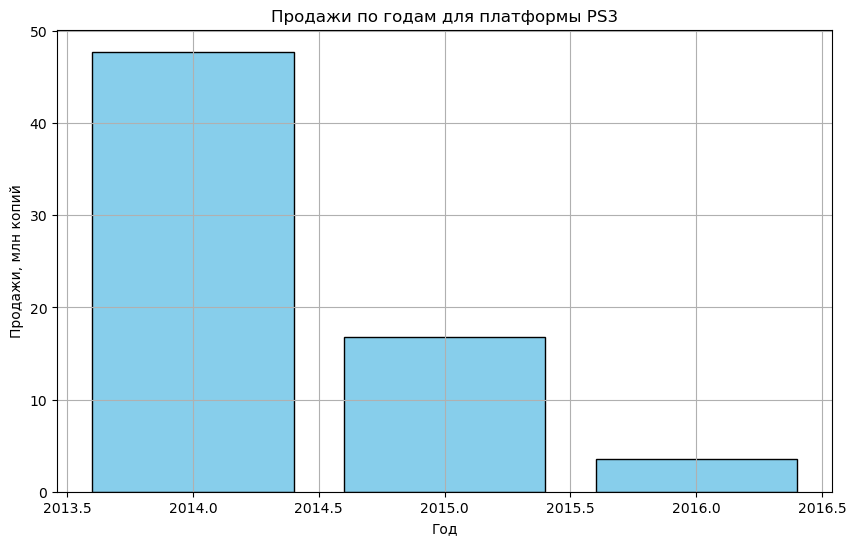

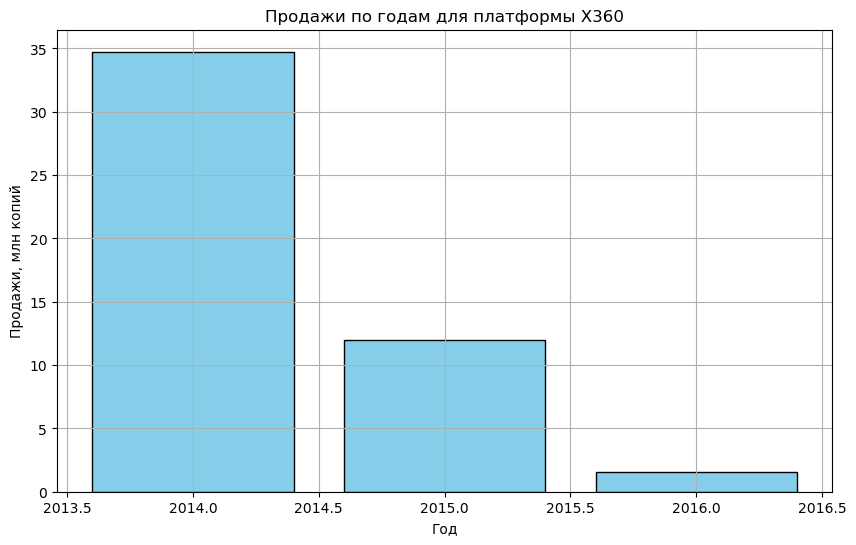

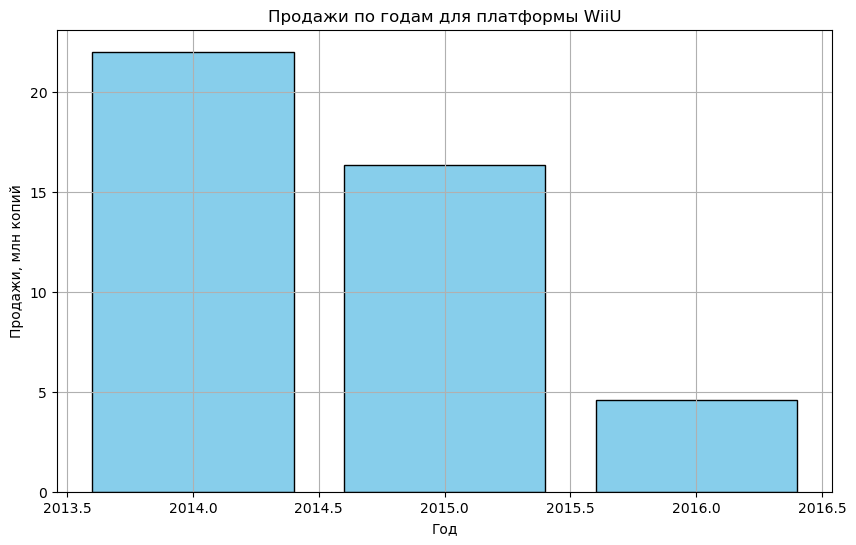

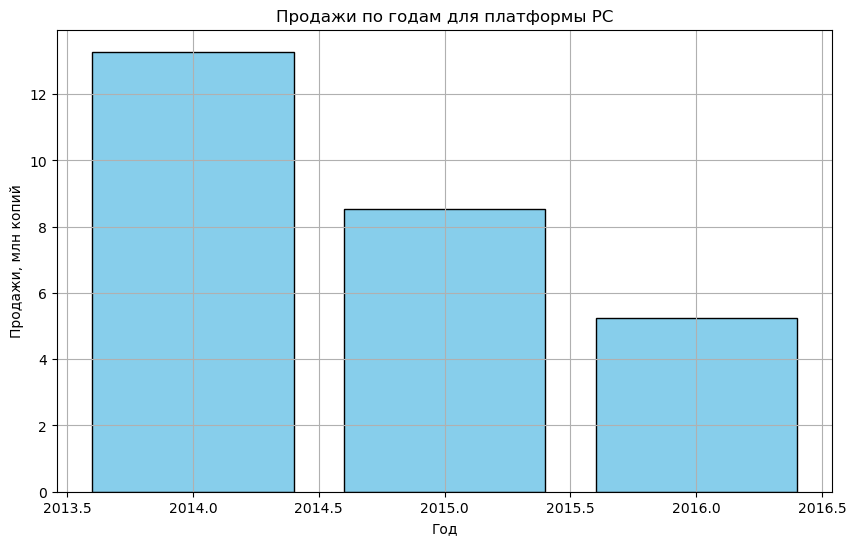

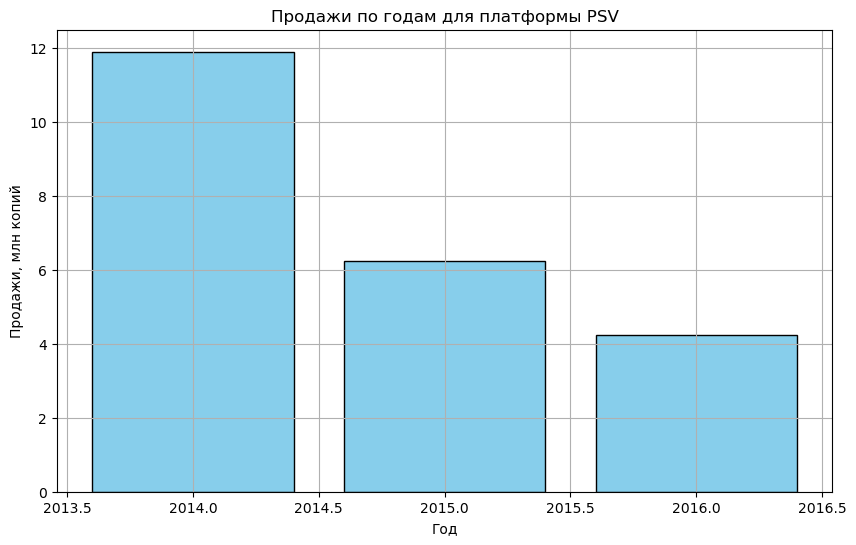

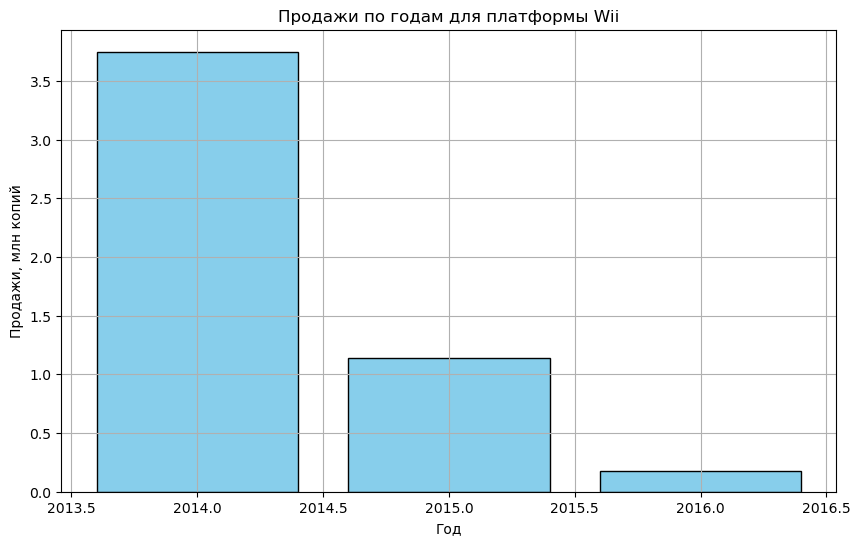

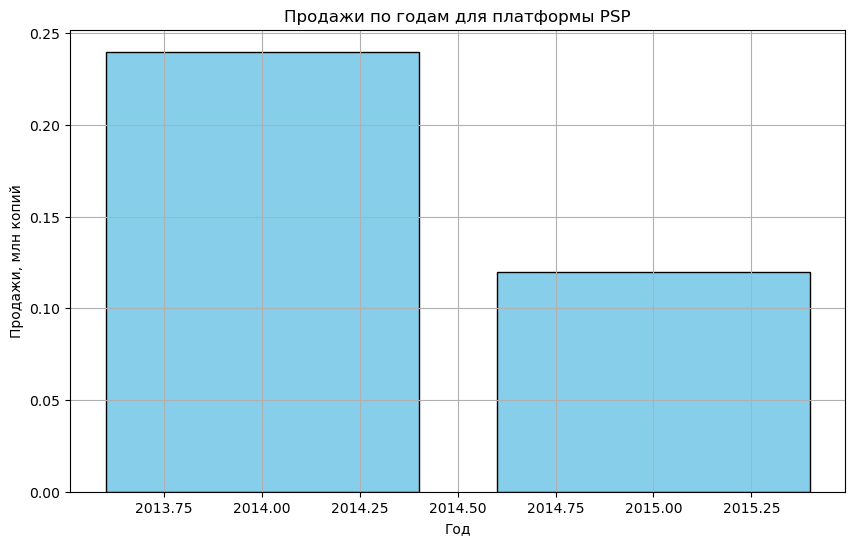

In [34]:
for platform in actual_platform_sales.index:
    plt.figure(figsize=(10, 6))
    platform_sales_by_year = actual_data[actual_data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
    plt.bar(platform_sales_by_year.index, platform_sales_by_year['sum_sales'], color='skyblue', edgecolor='black')
    plt.title(f'Продажи по годам для платформы {platform}')
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн копий')
    plt.grid(True)
    plt.show()

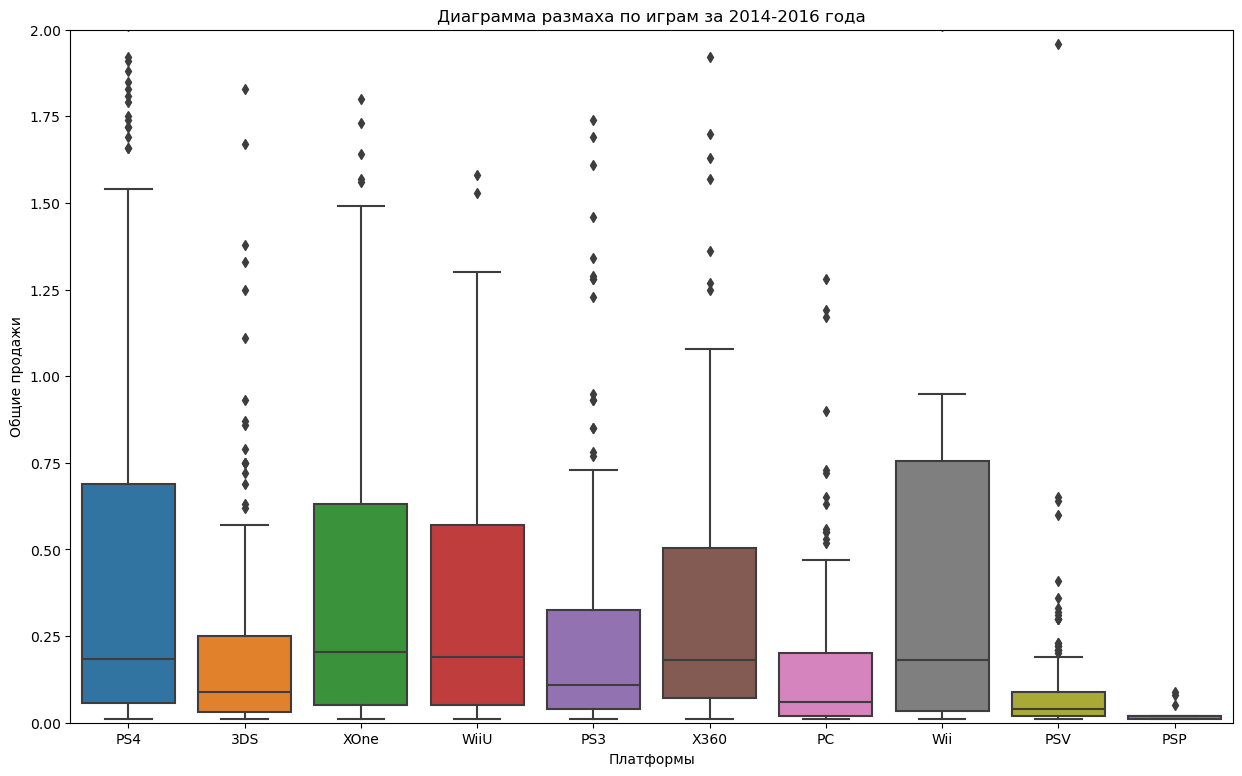

In [35]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=actual_data, x='platform', y='sum_sales')
plt.title('Диаграмма размаха по играм за 2014-2016 года')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 2)
plt.show()

,platform,sum_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


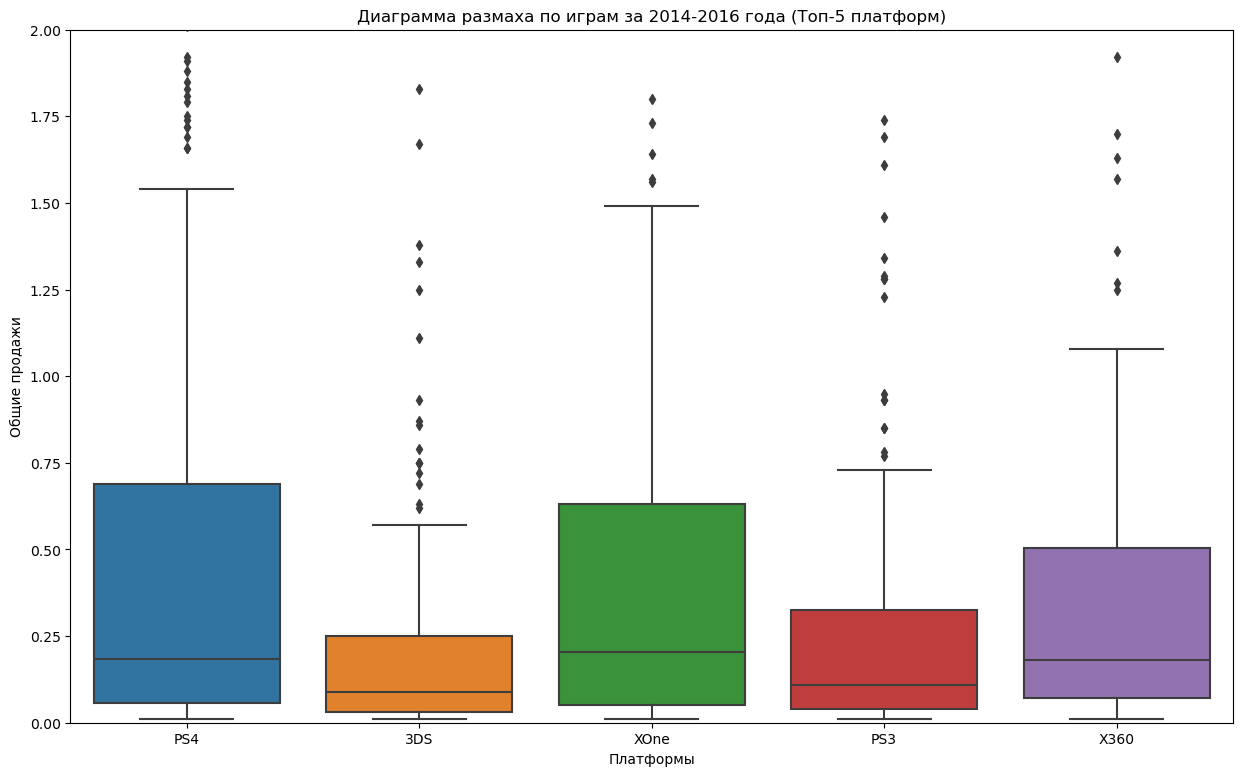

In [56]:
platform_sales = actual_data.groupby('platform')['sum_sales'].sum().reset_index()

sorted_platform_sales = platform_sales.sort_values(by='sum_sales', ascending=False).reset_index(drop=True)
display(sorted_platform_sales)

top_platforms = sorted_platform_sales.head(5)['platform']
top_platform_data = actual_data[actual_data['platform'].isin(top_platforms)]

plt.figure(figsize=(15, 9))
sns.boxplot(data=top_platform_data, x='platform', y='sum_sales')
plt.title('Диаграмма размаха по играм за 2014-2016 года (Топ-5 платформ)')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 2)
plt.show()

In [36]:
def analyze_platform(platform, actual_data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='critic_score', y='sum_sales', data=actual_data[actual_data['platform'] == platform], alpha=0.5)
    plt.title(f'Диаграмма рассеяния для отзывов критиков на платформе {platform}')
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Глобальные продажи, млн копий')
    plt.grid(True)
    plt.show() 

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='user_score', y='sum_sales', data=actual_data[actual_data['platform'] == platform], alpha=0.5)
    plt.title(f'Диаграмма рассеяния для отзывов пользователей на платформе {platform}')
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Глобальные продажи, млн копий')
    plt.grid(True)
    plt.show() 

    critic_corr = actual_data[actual_data['platform'] == platform]['critic_score'].corr(actual_data[actual_data['platform'] == platform]['sum_sales'])
    user_corr = actual_data[actual_data['platform'] == platform]['user_score'].corr(actual_data[actual_data['platform'] == platform]['sum_sales'])
    print(f'Коэффициент корреляции продаж и оценки критиков для платформы {platform}: {critic_corr:.2f}')
    print(f'Коэффициент корреляции продаж и оценки пользователей для платформы {platform}: {user_corr:.2f}\n')

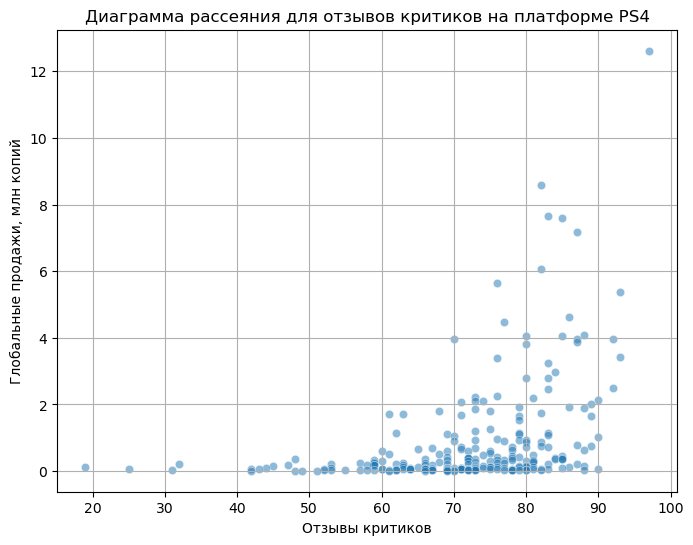

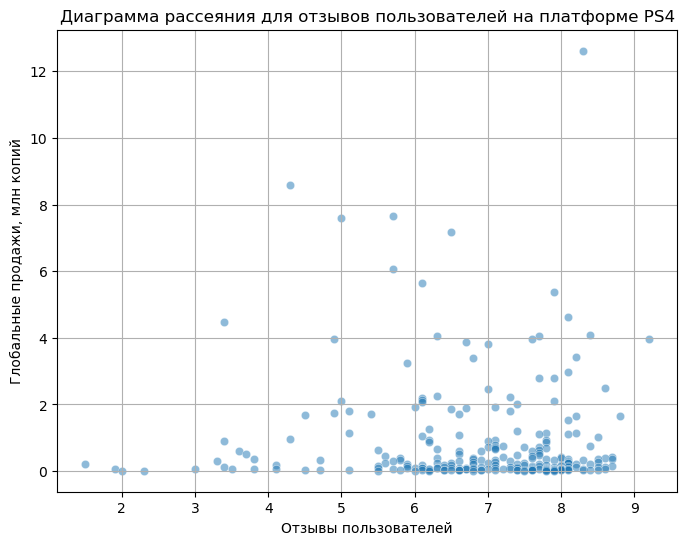

Коэффициент корреляции продаж и оценки критиков для платформы PS4: 0.40
Коэффициент корреляции продаж и оценки пользователей для платформы PS4: -0.04



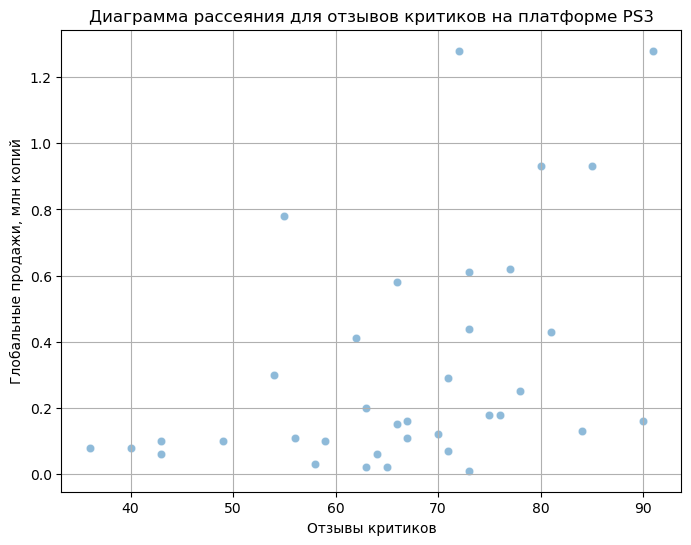

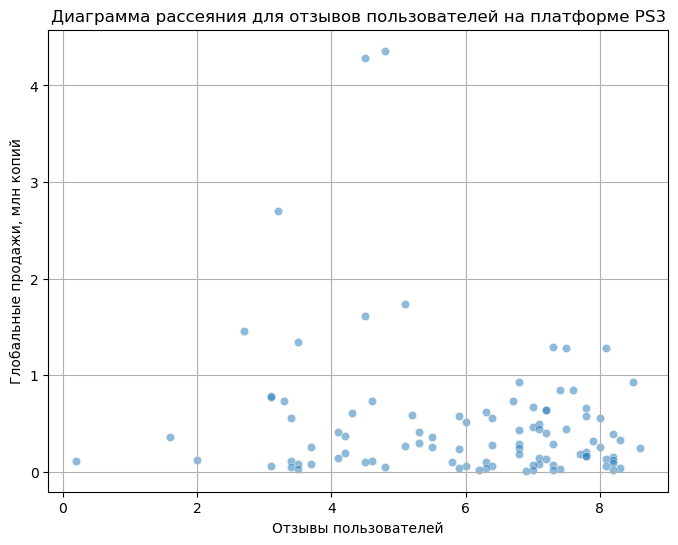

Коэффициент корреляции продаж и оценки критиков для платформы PS3: 0.45
Коэффициент корреляции продаж и оценки пользователей для платформы PS3: -0.17



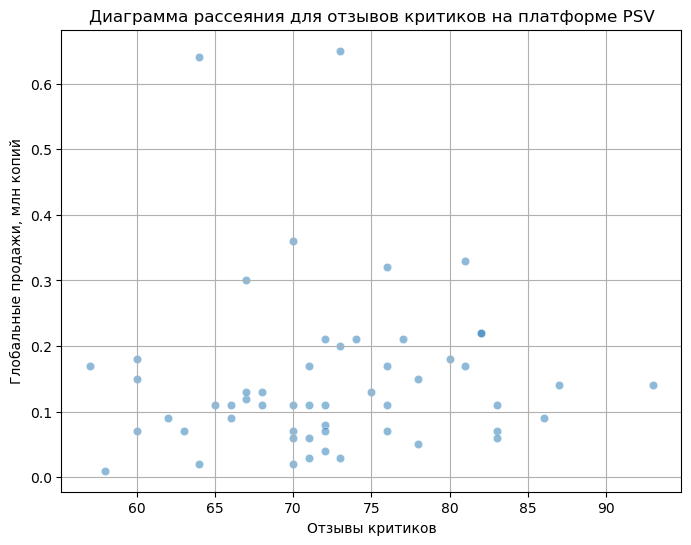

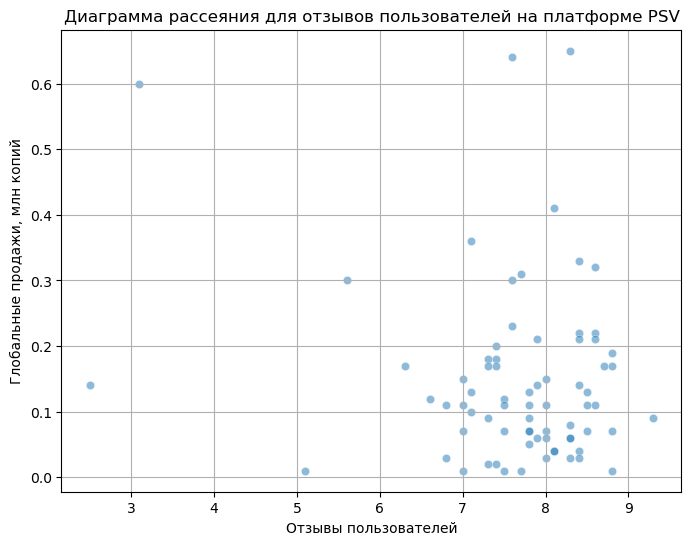

Коэффициент корреляции продаж и оценки критиков для платформы PSV: 0.04
Коэффициент корреляции продаж и оценки пользователей для платформы PSV: -0.17



In [37]:
for platform in ['PS4', 'PS3', 'PSV']:
    analyze_platform(platform, actual_data)

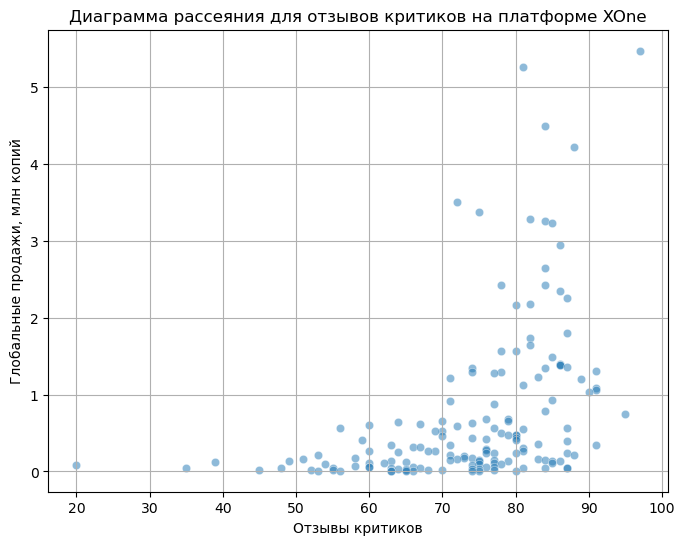

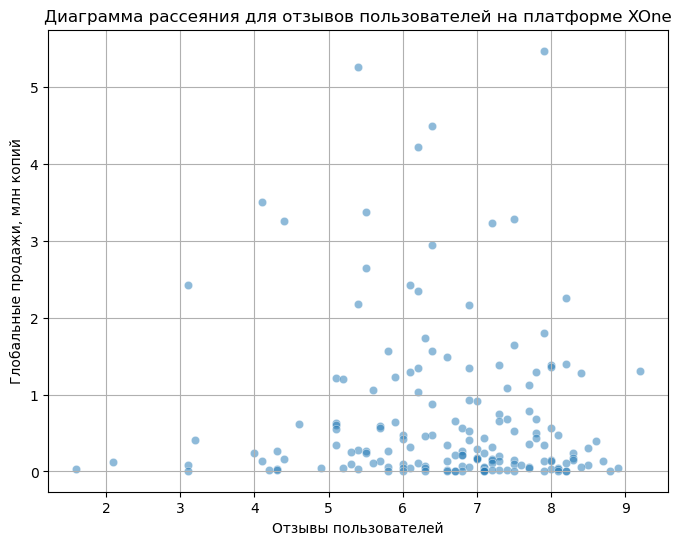

Коэффициент корреляции продаж и оценки критиков для платформы XOne: 0.43
Коэффициент корреляции продаж и оценки пользователей для платформы XOne: -0.07



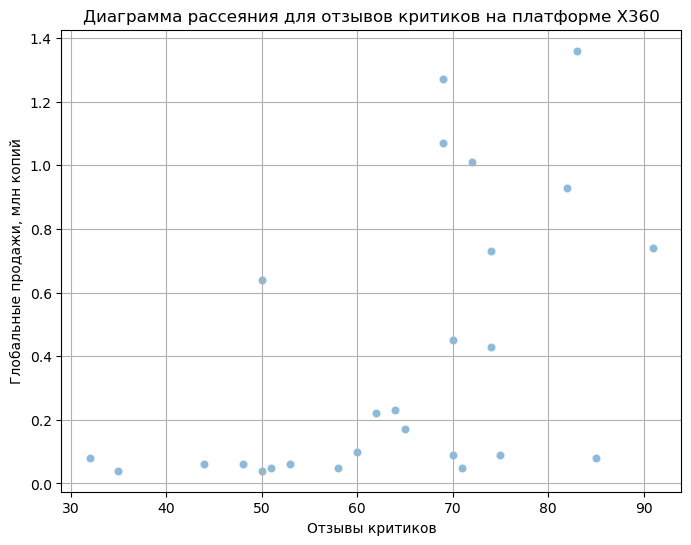

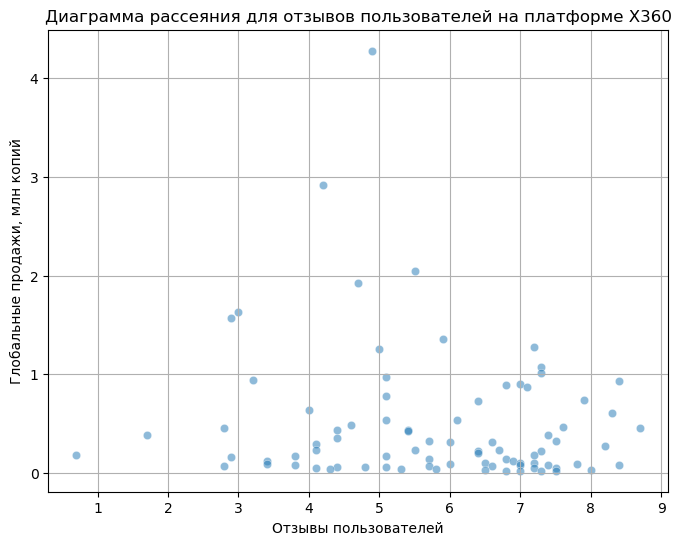

Коэффициент корреляции продаж и оценки критиков для платформы X360: 0.53
Коэффициент корреляции продаж и оценки пользователей для платформы X360: -0.14



In [38]:
for platform in ['XOne', 'X360']:
    analyze_platform(platform, actual_data)

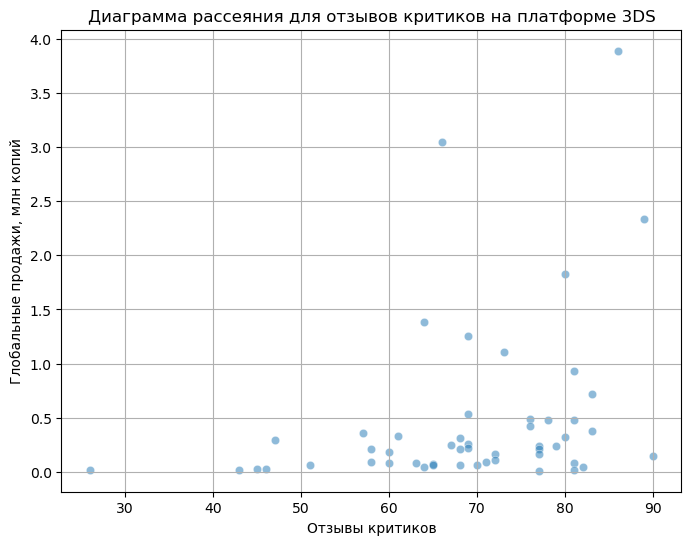

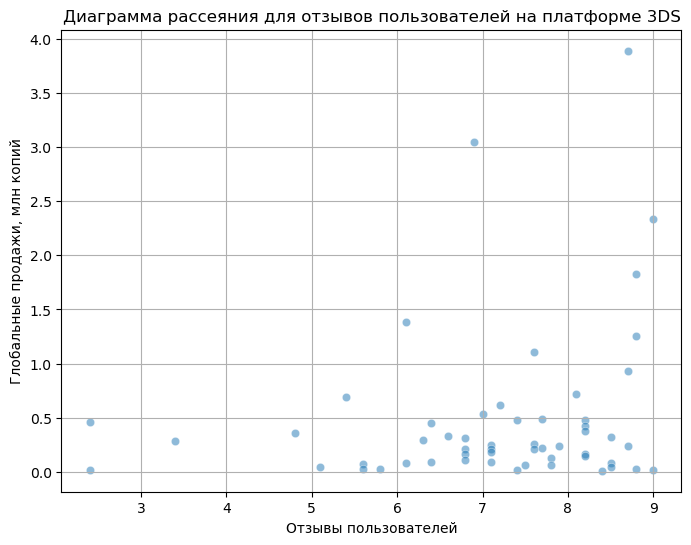

Коэффициент корреляции продаж и оценки критиков для платформы 3DS: 0.31
Коэффициент корреляции продаж и оценки пользователей для платформы 3DS: 0.22



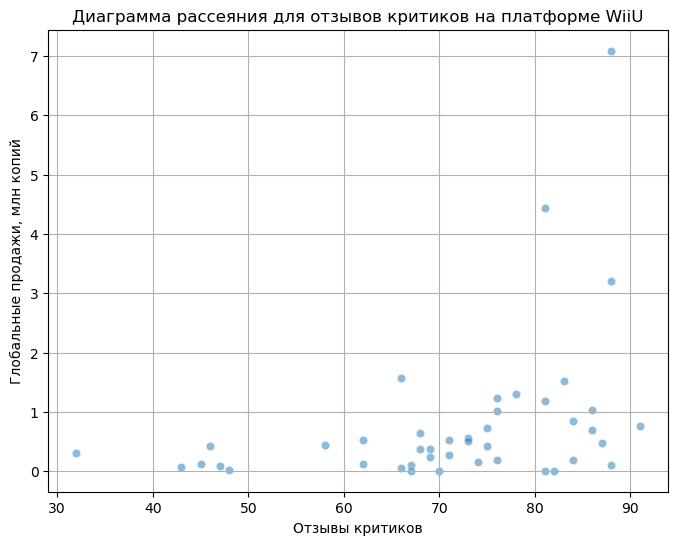

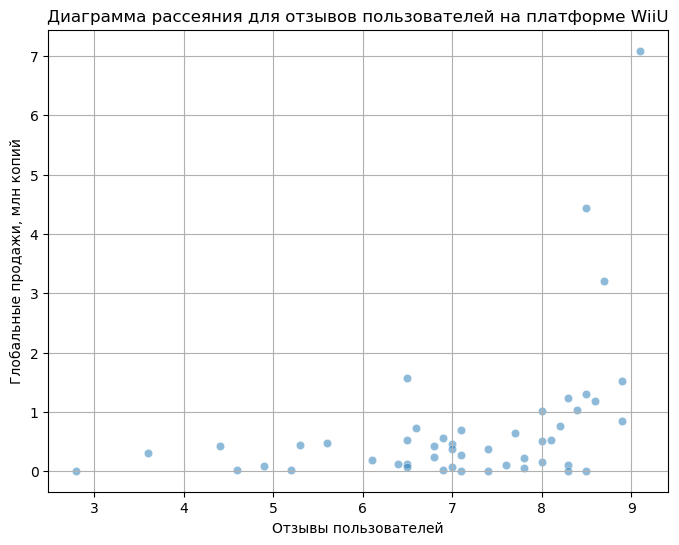

Коэффициент корреляции продаж и оценки критиков для платформы WiiU: 0.37
Коэффициент корреляции продаж и оценки пользователей для платформы WiiU: 0.41



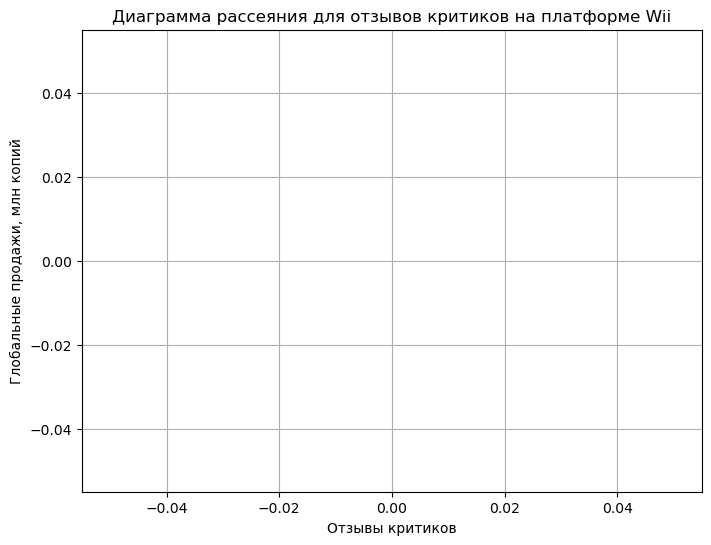

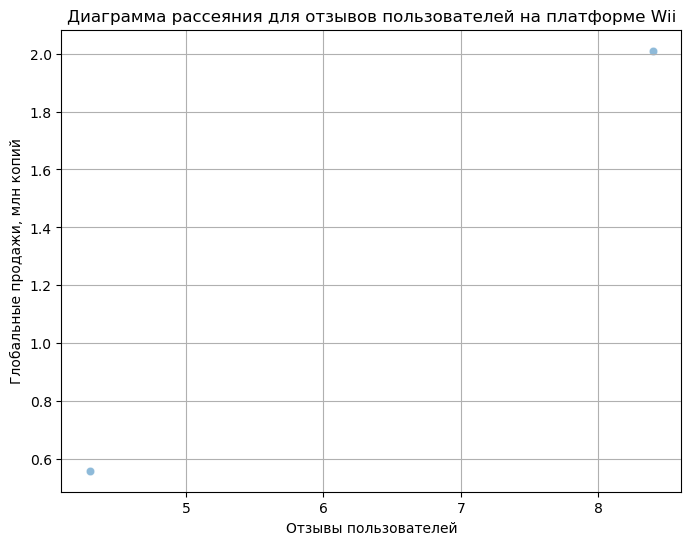

Коэффициент корреляции продаж и оценки критиков для платформы Wii: nan
Коэффициент корреляции продаж и оценки пользователей для платформы Wii: 1.00



In [39]:
for platform in ['3DS', 'WiiU', 'Wii']:
    analyze_platform(platform, actual_data)

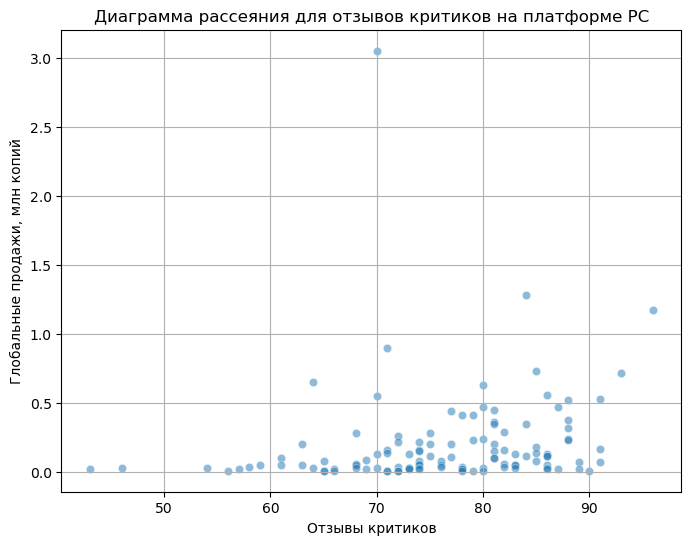

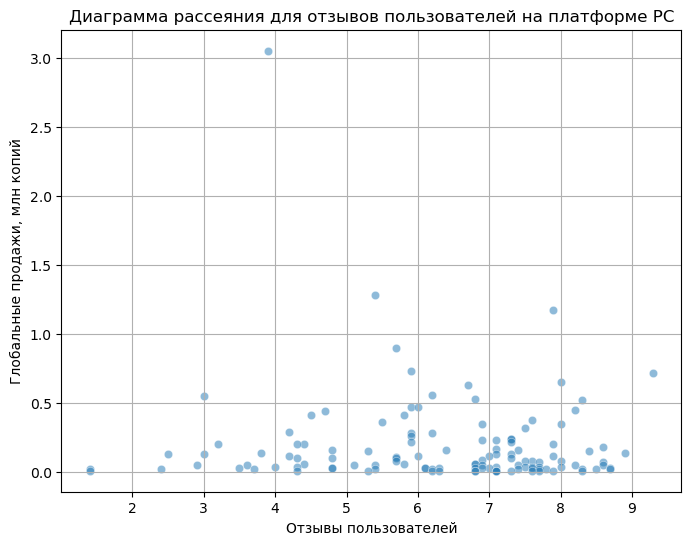

Коэффициент корреляции продаж и оценки критиков для платформы PC: 0.17
Коэффициент корреляции продаж и оценки пользователей для платформы PC: -0.07



In [40]:
analyze_platform('PC', actual_data)

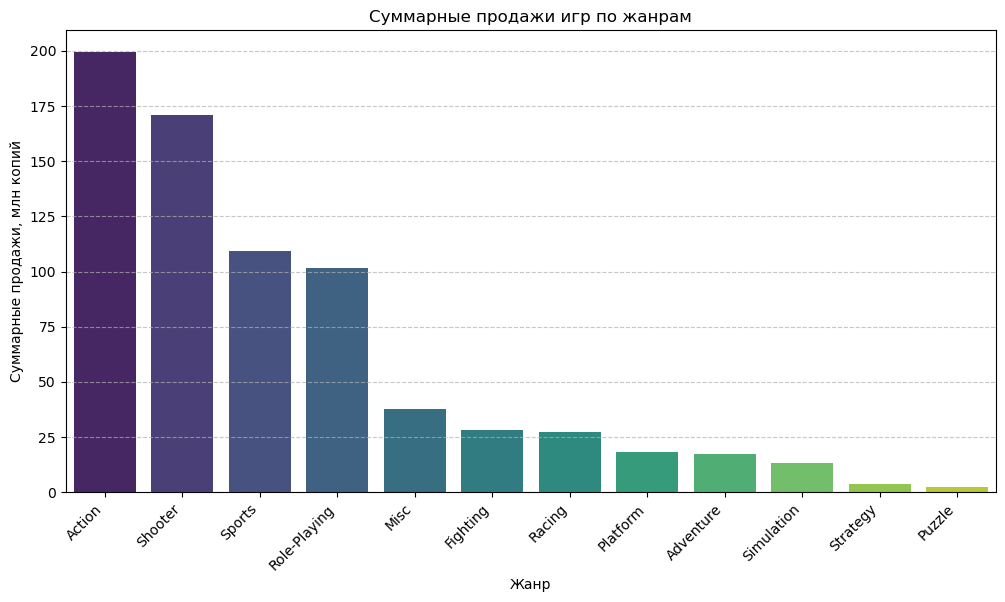

Наиболее прибыльные жанры:
genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Name: sum_sales, dtype: float64

Жанры с наименьшими продажами:
genre
Platform      18.09
Adventure     17.55
Simulation    13.13
Strategy       3.96
Puzzle         2.21
Name: sum_sales, dtype: float64


In [41]:
genre_sales = actual_data.groupby('genre')['sum_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн копий')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Наиболее прибыльные жанры:")
print(genre_sales.head(5))
print("\nЖанры с наименьшими продажами:")
print(genre_sales.tail(5))

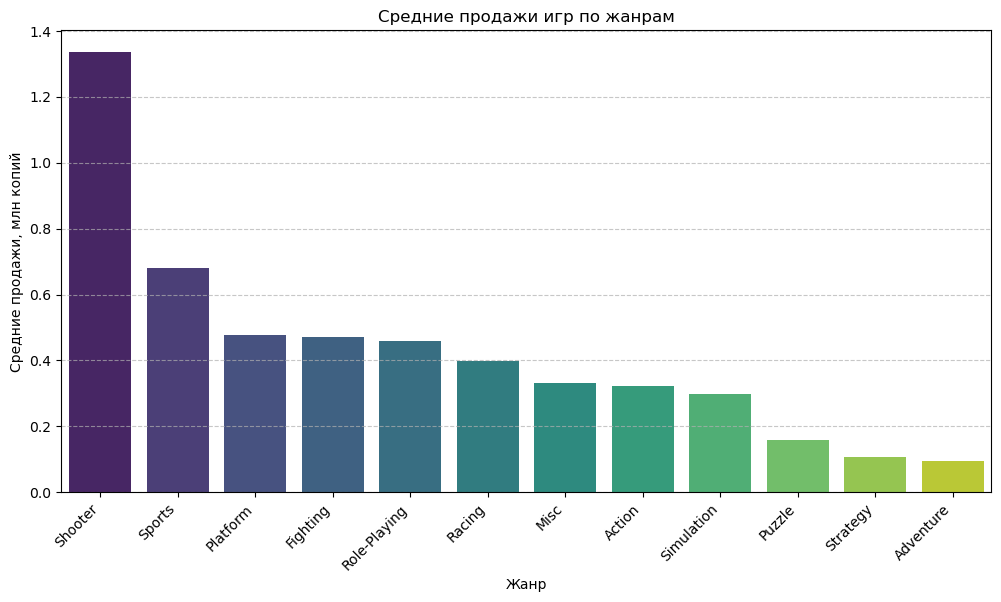

Наиболее прибыльные жанры:
genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Name: sum_sales, dtype: float64

Жанры с наименьшими продажами:
genre
Action        0.322068
Simulation    0.298409
Puzzle        0.157857
Strategy      0.107027
Adventure     0.094865
Name: sum_sales, dtype: float64


In [60]:
genre_mean_sales = actual_data.groupby('genre')['sum_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_mean_sales.index, y=genre_mean_sales.values, palette="viridis")
plt.title('Средние продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи, млн копий')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Наиболее прибыльные жанры:")
print(genre_mean_sales.head(5))
print("\nЖанры с наименьшими продажами:")
print(genre_mean_sales.tail(5))

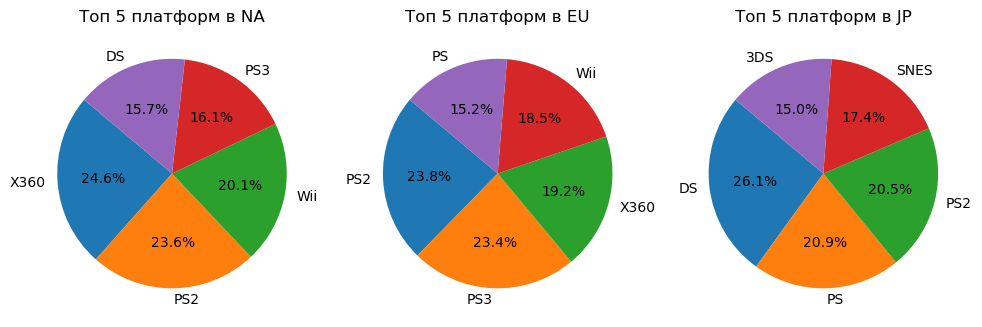

Регион NA:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Регион EU:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Регион JP:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64



In [42]:
platform_sales = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
na_sales = platform_sales['na_sales'].nlargest(5)
eu_sales = platform_sales['eu_sales'].nlargest(5)
jp_sales = platform_sales['jp_sales'].nlargest(5)

labels_na = na_sales.index
labels_eu = eu_sales.index
labels_jp = jp_sales.index

sizes_na = na_sales.values
sizes_eu = eu_sales.values
sizes_jp = jp_sales.values

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.pie(sizes_na, labels=labels_na, autopct='%1.1f%%', startangle=140)
plt.title('Топ 5 платформ в NA')

plt.subplot(1, 3, 2)
plt.pie(sizes_eu, labels=labels_eu, autopct='%1.1f%%', startangle=140)
plt.title('Топ 5 платформ в EU')

plt.subplot(1, 3, 3)
plt.pie(sizes_jp, labels=labels_jp, autopct='%1.1f%%', startangle=140)
plt.title('Топ 5 платформ в JP')

plt.tight_layout()
plt.show()
print(f"Регион NA:\n{platform_sales['na_sales'].nlargest(5)}\n")
print(f"Регион EU:\n{platform_sales['eu_sales'].nlargest(5)}\n")
print(f"Регион JP:\n{platform_sales['jp_sales'].nlargest(5)}\n")

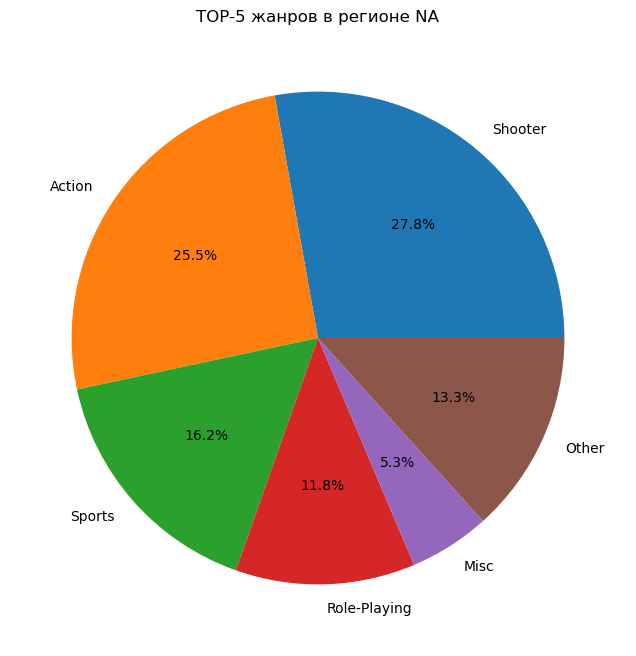

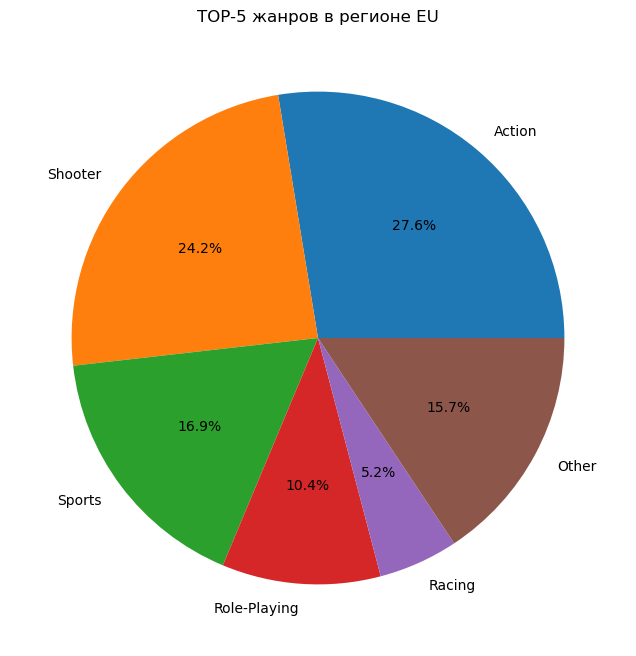

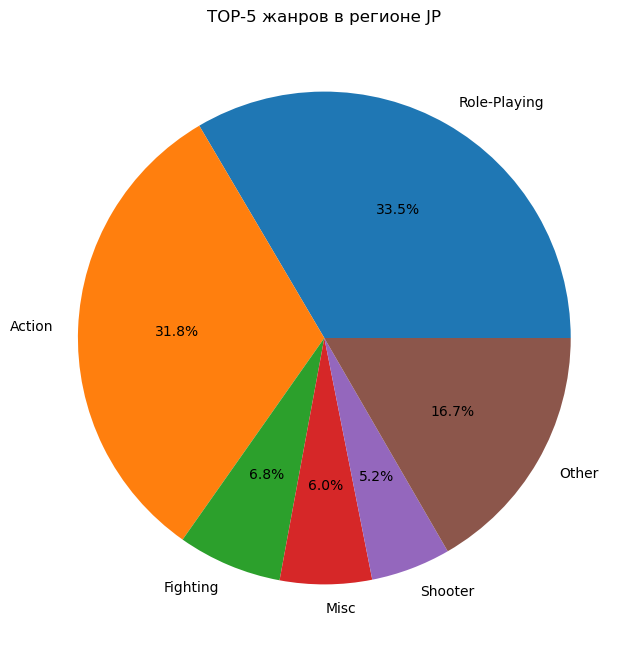

In [43]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    
    region_data = actual_data.pivot_table(index='genre', values=region, aggfunc='sum')
    top_genres = region_data.sort_values(by=region, ascending=False).head(5)
    other_sales = region_data[region].sum() - top_genres[region].sum()
    top_genres.loc['Other'] = other_sales
    
    plt.figure(figsize=(8, 8))
    plt.pie(top_genres[region], labels=top_genres.index, autopct='%1.1f%%')
    plt.title(f'TOP-5 жанров в регионе {region[:-6].upper()}')
    plt.show()

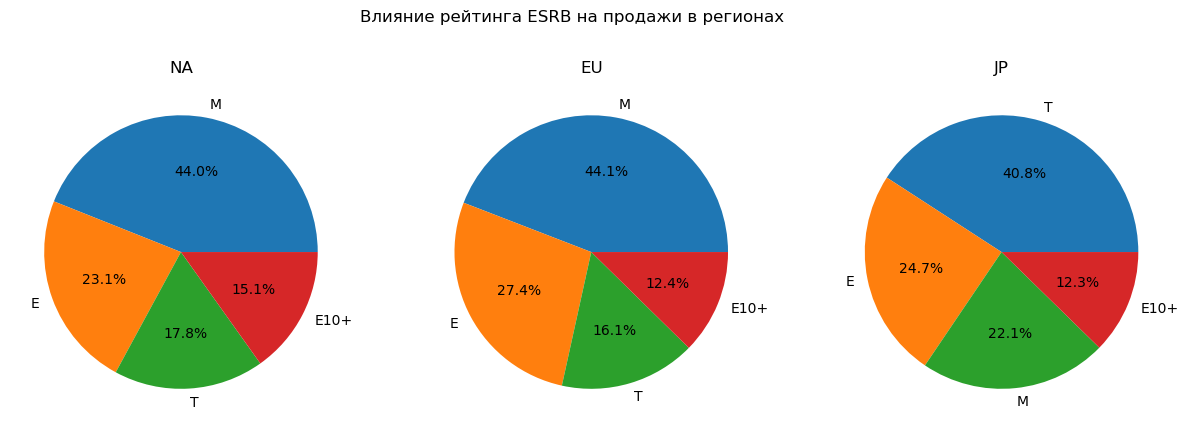

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')

regions = ['na_sales', 'eu_sales', 'jp_sales']

for i, region in enumerate(regions):
    df_i = actual_data.groupby('rating')[region].sum().nlargest(5).reset_index()
    axs[i].pie(df_i[region], labels=df_i['rating'], autopct='%1.1f%%')
    axs[i].set_title(region.split('_')[0].upper())
plt.show()

In [45]:
xbox_one = actual_data[actual_data['platform'] == 'XOne']['user_score'].dropna()
pc = actual_data[actual_data['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(xbox_one, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [46]:
action = actual_data[actual_data['genre'] == 'Action']['user_score'].dropna()
sports = actual_data[actual_data['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results = stats.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу
